In [7]:
import pandas as pd

In [8]:
!pip install pyspark

In [9]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("SparkbyExamples.com").getOrCreate()
import pandas as pd

In [10]:
sc=spark.sparkContext

In [6]:
df=spark.read.option('header',True).csv("/content/healthcare-dataset-stroke-data.csv")

In [11]:
df.show()

+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female| 49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female| 79|           1|            0|         Yes|Self

In [12]:
from pyspark.sql.functions import col

In [13]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [14]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: string (nullable = true)



In [15]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [16]:
indexer = StringIndexer(inputCol = 'gender', outputCol = 'Gender').fit(df)
df = indexer.transform(df)

In [17]:
df.show()

+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|Gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|   1.0| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|   0.0| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|   1.0| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|   0.0| 49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|   0.0| 79|           1|            0|         Yes|Self

In [18]:
indexer = StringIndexer(inputCol = 'ever_married', outputCol = 'Marital Status').fit(df)
df = indexer.transform(df)

In [19]:
df.show()

+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+--------------+
|   id|Gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|Marital Status|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+--------------+
| 9046|   1.0| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|           0.0|
|51676|   0.0| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|           0.0|
|31112|   1.0| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|           0.0|
|60182|   0.0| 49|           0|            0|         Yes|      Private|         Urban|           171.23|3

In [20]:
df = df.drop('ever_married')
df.show()

+-----+------+---+------------+-------------+-------------+--------------+-----------------+----+---------------+------+--------------+
|   id|Gender|age|hypertension|heart_disease|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|Marital Status|
+-----+------+---+------------+-------------+-------------+--------------+-----------------+----+---------------+------+--------------+
| 9046|   1.0| 67|           0|            1|      Private|         Urban|           228.69|36.6|formerly smoked|     1|           0.0|
|51676|   0.0| 61|           0|            0|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|           0.0|
|31112|   1.0| 80|           0|            1|      Private|         Rural|           105.92|32.5|   never smoked|     1|           0.0|
|60182|   0.0| 49|           0|            0|      Private|         Urban|           171.23|34.4|         smokes|     1|           0.0|
| 1665|   0.0| 79|           1|            0|Sel

In [21]:
indexer = StringIndexer(inputCol = 'work_type', outputCol = 'Work').fit(df)
df = indexer.transform(df)

In [22]:
df.show()

+-----+------+---+------------+-------------+-------------+--------------+-----------------+----+---------------+------+--------------+----+
|   id|Gender|age|hypertension|heart_disease|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|Marital Status|Work|
+-----+------+---+------------+-------------+-------------+--------------+-----------------+----+---------------+------+--------------+----+
| 9046|   1.0| 67|           0|            1|      Private|         Urban|           228.69|36.6|formerly smoked|     1|           0.0| 0.0|
|51676|   0.0| 61|           0|            0|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|           0.0| 1.0|
|31112|   1.0| 80|           0|            1|      Private|         Rural|           105.92|32.5|   never smoked|     1|           0.0| 0.0|
|60182|   0.0| 49|           0|            0|      Private|         Urban|           171.23|34.4|         smokes|     1|           0.0| 0.0|
| 1665|   0.0

In [23]:
df = df.drop('work_type')
df.show()

+-----+------+---+------------+-------------+--------------+-----------------+----+---------------+------+--------------+----+
|   id|Gender|age|hypertension|heart_disease|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|Marital Status|Work|
+-----+------+---+------------+-------------+--------------+-----------------+----+---------------+------+--------------+----+
| 9046|   1.0| 67|           0|            1|         Urban|           228.69|36.6|formerly smoked|     1|           0.0| 0.0|
|51676|   0.0| 61|           0|            0|         Rural|           202.21| N/A|   never smoked|     1|           0.0| 1.0|
|31112|   1.0| 80|           0|            1|         Rural|           105.92|32.5|   never smoked|     1|           0.0| 0.0|
|60182|   0.0| 49|           0|            0|         Urban|           171.23|34.4|         smokes|     1|           0.0| 0.0|
| 1665|   0.0| 79|           1|            0|         Rural|           174.12|  24|   never smoked|     1|     

In [24]:
indexer = StringIndexer(inputCol = 'Residence_type', outputCol = 'Residence').fit(df)
df = indexer.transform(df)
indexer = StringIndexer(inputCol = 'smoking_status', outputCol = 'Smoking').fit(df)
df = indexer.transform(df)

In [25]:
df.show()

+-----+------+---+------------+-------------+--------------+-----------------+----+---------------+------+--------------+----+---------+-------+
|   id|Gender|age|hypertension|heart_disease|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|Marital Status|Work|Residence|Smoking|
+-----+------+---+------------+-------------+--------------+-----------------+----+---------------+------+--------------+----+---------+-------+
| 9046|   1.0| 67|           0|            1|         Urban|           228.69|36.6|formerly smoked|     1|           0.0| 0.0|      0.0|    2.0|
|51676|   0.0| 61|           0|            0|         Rural|           202.21| N/A|   never smoked|     1|           0.0| 1.0|      1.0|    0.0|
|31112|   1.0| 80|           0|            1|         Rural|           105.92|32.5|   never smoked|     1|           0.0| 0.0|      1.0|    0.0|
|60182|   0.0| 49|           0|            0|         Urban|           171.23|34.4|         smokes|     1|           0.0| 0.0|    

In [26]:
df = df.drop('Residence_type','smoking_status')
df.show()

+-----+------+---+------------+-------------+-----------------+----+------+--------------+----+---------+-------+
|   id|Gender|age|hypertension|heart_disease|avg_glucose_level| bmi|stroke|Marital Status|Work|Residence|Smoking|
+-----+------+---+------------+-------------+-----------------+----+------+--------------+----+---------+-------+
| 9046|   1.0| 67|           0|            1|           228.69|36.6|     1|           0.0| 0.0|      0.0|    2.0|
|51676|   0.0| 61|           0|            0|           202.21| N/A|     1|           0.0| 1.0|      1.0|    0.0|
|31112|   1.0| 80|           0|            1|           105.92|32.5|     1|           0.0| 0.0|      1.0|    0.0|
|60182|   0.0| 49|           0|            0|           171.23|34.4|     1|           0.0| 0.0|      0.0|    3.0|
| 1665|   0.0| 79|           1|            0|           174.12|  24|     1|           0.0| 1.0|      1.0|    0.0|
|56669|   1.0| 81|           0|            0|           186.21|  29|     1|           0.

In [27]:
print(df.count())
df=df.filter(df.bmi!='N/A')
df.show()
print(df.count())

5110
+-----+------+---+------------+-------------+-----------------+----+------+--------------+----+---------+-------+
|   id|Gender|age|hypertension|heart_disease|avg_glucose_level| bmi|stroke|Marital Status|Work|Residence|Smoking|
+-----+------+---+------------+-------------+-----------------+----+------+--------------+----+---------+-------+
| 9046|   1.0| 67|           0|            1|           228.69|36.6|     1|           0.0| 0.0|      0.0|    2.0|
|31112|   1.0| 80|           0|            1|           105.92|32.5|     1|           0.0| 0.0|      1.0|    0.0|
|60182|   0.0| 49|           0|            0|           171.23|34.4|     1|           0.0| 0.0|      0.0|    3.0|
| 1665|   0.0| 79|           1|            0|           174.12|  24|     1|           0.0| 1.0|      1.0|    0.0|
|56669|   1.0| 81|           0|            0|           186.21|  29|     1|           0.0| 0.0|      0.0|    2.0|
|53882|   1.0| 74|           1|            1|            70.09|27.4|     1|        

In [28]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- Gender: double (nullable = false)
 |-- age: string (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- avg_glucose_level: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- stroke: string (nullable = true)
 |-- Marital Status: double (nullable = false)
 |-- Work: double (nullable = false)
 |-- Residence: double (nullable = false)
 |-- Smoking: double (nullable = false)



In [29]:
a = ['age','hypertension','heart_disease','bmi','stroke','avg_glucose_level']

In [30]:
from pyspark.sql.types import IntegerType
for i in a:
  df=df.withColumn(i,df[i].cast(IntegerType()))

In [31]:
df.show()

+-----+------+---+------------+-------------+-----------------+---+------+--------------+----+---------+-------+
|   id|Gender|age|hypertension|heart_disease|avg_glucose_level|bmi|stroke|Marital Status|Work|Residence|Smoking|
+-----+------+---+------------+-------------+-----------------+---+------+--------------+----+---------+-------+
| 9046|   1.0| 67|           0|            1|              228| 36|     1|           0.0| 0.0|      0.0|    2.0|
|31112|   1.0| 80|           0|            1|              105| 32|     1|           0.0| 0.0|      1.0|    0.0|
|60182|   0.0| 49|           0|            0|              171| 34|     1|           0.0| 0.0|      0.0|    3.0|
| 1665|   0.0| 79|           1|            0|              174| 24|     1|           0.0| 1.0|      1.0|    0.0|
|56669|   1.0| 81|           0|            0|              186| 29|     1|           0.0| 0.0|      0.0|    2.0|
|53882|   1.0| 74|           1|            1|               70| 27|     1|           0.0| 0.0|  

In [32]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- Gender: double (nullable = false)
 |-- age: integer (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- avg_glucose_level: integer (nullable = true)
 |-- bmi: integer (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- Marital Status: double (nullable = false)
 |-- Work: double (nullable = false)
 |-- Residence: double (nullable = false)
 |-- Smoking: double (nullable = false)



In [33]:
input=['Gender','age','hypertension','heart_disease','avg_glucose_level','bmi','Marital Status','Work','Residence','Smoking']

In [34]:
from pyspark.ml.feature import VectorAssembler
df_va = VectorAssembler(inputCols = input, outputCol = 'features')
df = df_va.transform(df)

In [35]:
df.show()

+-----+------+---+------------+-------------+-----------------+---+------+--------------+----+---------+-------+--------------------+
|   id|Gender|age|hypertension|heart_disease|avg_glucose_level|bmi|stroke|Marital Status|Work|Residence|Smoking|            features|
+-----+------+---+------------+-------------+-----------------+---+------+--------------+----+---------+-------+--------------------+
| 9046|   1.0| 67|           0|            1|              228| 36|     1|           0.0| 0.0|      0.0|    2.0|[1.0,67.0,0.0,1.0...|
|31112|   1.0| 80|           0|            1|              105| 32|     1|           0.0| 0.0|      1.0|    0.0|[1.0,80.0,0.0,1.0...|
|60182|   0.0| 49|           0|            0|              171| 34|     1|           0.0| 0.0|      0.0|    3.0|(10,[1,4,5,9],[49...|
| 1665|   0.0| 79|           1|            0|              174| 24|     1|           0.0| 1.0|      1.0|    0.0|[0.0,79.0,1.0,0.0...|
|56669|   1.0| 81|           0|            0|              186

In [36]:
train, test = df.randomSplit([0.8,0.2],seed=11)

In [37]:
train.count()

3935

In [38]:
test.count()

974

In [39]:
df.count()

4909

In [40]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

log_reg = LogisticRegression(featuresCol='features',
                             labelCol='stroke')



In [41]:
pipe = Pipeline(stages = [log_reg])

In [42]:
fit_model = pipe.fit(train)

In [43]:
results = fit_model.transform(test)

In [44]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import classification_report

In [45]:
results.select("stroke", "prediction").show(5)

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 5 rows



In [46]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [47]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [48]:
evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")

In [49]:
accuracy = evaluator.evaluate(results)

In [72]:
print(f"Accuracy: {accuracy}")
from pyspark.ml.classification import DecisionTreeClassifier
l=accuracy

Accuracy: 0.96051227321238


In [71]:
dt_class = DecisionTreeClassifier(featuresCol='features',
                             labelCol='stroke')
pipedt = Pipeline(stages = [dt_class])
fitdt_model = pipedt.fit(train)
resultsdt = fitdt_model.transform(test)
resultsdt.select("stroke", "prediction")
evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
rfaccuracy = evaluator.evaluate(resultsdt)
print(f"Accuracy: {rfaccuracy}")
rf=rfaccuracy

Accuracy: 0.9558521560574949


HYPER PARAMETER TUNING FOR RANDOM FOREST


In [63]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
stringIndexer  = StringIndexer(inputCol="stroke", outputCol="label")
assembler = VectorAssembler(inputCols=['Gender','age','hypertension','heart_disease','avg_glucose_level','bmi','Marital Status','Work','Residence','Smoking'], outputCol="featuresrf")
rf = RandomForestClassifier(labelCol="label", featuresCol="featuresrf")
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)
pipeline = Pipeline(stages=[stringIndexer, assembler, rf])
paramGrid = ParamGridBuilder().addGrid(rf.numTrees, [10, 20, 30]).addGrid(rf.maxDepth, [5, 10, 15]).build()

cross_validator = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy"),
                          numFolds=5, seed=42)

cv_model = cross_validator.fit(train_data)


In [64]:
best_rf_model = cv_model.bestModel.stages[-1]
importances = best_rf_model.featureImportances
feature_list = ['Gender','age','hypertension','heart_disease','avg_glucose_level','bmi','Marital Status','Work','Residence','Smoking']

print("Feature Importances:")
for feature, importance in zip(feature_list, importances):
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Gender: 0.0155
age: 0.4101
hypertension: 0.0889
heart_disease: 0.0431
avg_glucose_level: 0.1518
bmi: 0.1426
Marital Status: 0.0361
Work: 0.0294
Residence: 0.0157
Smoking: 0.0670


In [70]:
predictions = cv_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
rfaccuracy = evaluator.evaluate(predictions)
print("Test set accuracy = {:.2f}".format(rfaccuracy))
hrf=rfaccuracy

Test set accuracy = 0.96


HYPER PARAMETER TUNING


In [66]:
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline


In [67]:
stringIndexer  = StringIndexer(inputCol="stroke", outputCol="label")
assembler = VectorAssembler(inputCols=['Gender','age','hypertension','heart_disease','avg_glucose_level','Marital Status','Work','Residence','Smoking'], outputCol="features1")
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
dt = DecisionTreeClassifier(labelCol='label', featuresCol='features1')
pipeline = Pipeline(stages=[stringIndexer, assembler, dt])
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [3, 5, 7]) \
    .addGrid(dt.minInstancesPerNode, [1, 3, 5]) \
    .build()

LOGISTIC REGRESSION


In [69]:
crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid,
                      evaluator=MulticlassClassificationEvaluator(
                      labelCol='label', predictionCol='prediction', metricName='accuracy'),
                      numFolds=5)

cvModel = crossval.fit(train_data)

best_model = cvModel.bestModel

predictions = best_model.transform(test_data)


evaluator = MulticlassClassificationEvaluator(labelCol="label", \
                  predictionCol="prediction", metricName="accuracy")
hlaccuracy = evaluator.evaluate(predictions)

print(f"Test Accuracy: {hlaccuracy:.2f}")
hl=hlaccuracy

Test Accuracy: 0.96


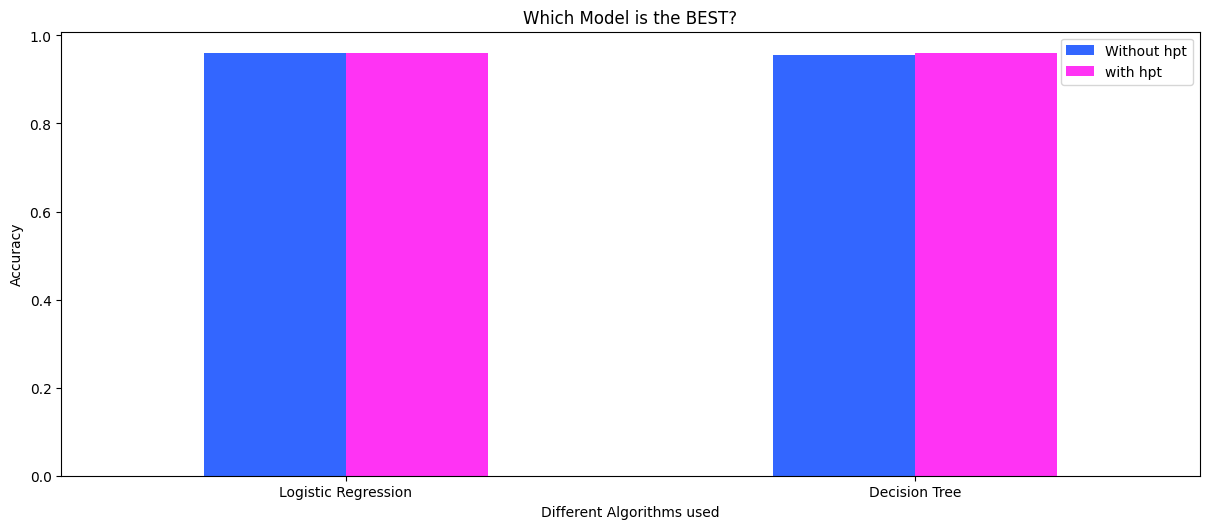

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
tags = ['Logistic Regression','Decision Tree']

a = [l,rf]
b = [hl,hrf]
colors = ['#3366FF', '#FF33F4']
df_histo = pd.DataFrame({'Without hpt':a , 'with hpt':b}, index=tags)
df_histo.plot.bar(rot=0, figsize=(12, 5),color=colors)
plt.tight_layout()
plt.xlabel('Different Algorithms used')
plt.ylabel('Accuracy')
plt.title('Which Model is the BEST?')
plt.show()